In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

594

In [6]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [7]:
# Create an empty list to hold the weather data.
city_data = []
#Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

#Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list.
for i, city in enumerate(cities):
    
    #Group cities in sets of 50 for logging purposes
    if(i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)
        
    #Create endpoint URL with each city
    city_url = url + "&q=" + city.replace(" ","+")
    
    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | grand-santi
Processing Record 2 of Set 1 | georgetown
Processing Record 3 of Set 1 | hithadhoo
Processing Record 4 of Set 1 | hermanus
Processing Record 5 of Set 1 | mareeba
Processing Record 6 of Set 1 | ushuaia
Processing Record 7 of Set 1 | beloha
Processing Record 8 of Set 1 | touros
Processing Record 9 of Set 1 | punta arenas
Processing Record 10 of Set 1 | iqaluit
Processing Record 11 of Set 1 | buraydah
Processing Record 12 of Set 1 | cockburn harbour
City not found. Skipping...
Processing Record 13 of Set 1 | albany
Processing Record 14 of Set 1 | tabou
Processing Record 15 of Set 1 | belyy yar
Processing Record 16 of Set 1 | zhangye
Processing Record 17 of Set 1 | ajdabiya
Processing Record 18 of Set 1 | lavrentiya
Processing Record 19 of Set 1 | tiksi
Processing Record 20 of Set 1 | harper
Processing Record 21 of Set 1 | delta del tigre
Processing Record 22 of Set 1 | sinnamary
Processi

Processing Record 38 of Set 4 | beihai
Processing Record 39 of Set 4 | roma
Processing Record 40 of Set 4 | bambanglipuro
Processing Record 41 of Set 4 | bequimao
Processing Record 42 of Set 4 | avarua
Processing Record 43 of Set 4 | cabinda
Processing Record 44 of Set 4 | kharitonovo
Processing Record 45 of Set 4 | nizwa
Processing Record 46 of Set 4 | marana
Processing Record 47 of Set 4 | taolanaro
City not found. Skipping...
Processing Record 48 of Set 4 | glendive
Processing Record 49 of Set 4 | mutoko
Processing Record 50 of Set 4 | faya
Processing Record 1 of Set 5 | ahtopol
Processing Record 2 of Set 5 | kamsack
Processing Record 3 of Set 5 | grand centre
City not found. Skipping...
Processing Record 4 of Set 5 | ribeira grande
Processing Record 5 of Set 5 | kahului
Processing Record 6 of Set 5 | ngukurr
City not found. Skipping...
Processing Record 7 of Set 5 | tumannyy
City not found. Skipping...
Processing Record 8 of Set 5 | afmadu
City not found. Skipping...
Processing Rec

Processing Record 28 of Set 8 | treinta y tres
Processing Record 29 of Set 8 | umzimvubu
City not found. Skipping...
Processing Record 30 of Set 8 | saleaula
City not found. Skipping...
Processing Record 31 of Set 8 | kirensk
Processing Record 32 of Set 8 | santa vitoria do palmar
Processing Record 33 of Set 8 | kuche
City not found. Skipping...
Processing Record 34 of Set 8 | nome
Processing Record 35 of Set 8 | hervey bay
Processing Record 36 of Set 8 | pacific grove
Processing Record 37 of Set 8 | dalneye konstantinovo
City not found. Skipping...
Processing Record 38 of Set 8 | karauzyak
City not found. Skipping...
Processing Record 39 of Set 8 | kieta
Processing Record 40 of Set 8 | alamogordo
Processing Record 41 of Set 8 | tangi
Processing Record 42 of Set 8 | uhlove
Processing Record 43 of Set 8 | cherskiy
Processing Record 44 of Set 8 | tawzar
City not found. Skipping...
Processing Record 45 of Set 8 | berlevag
Processing Record 46 of Set 8 | sicamous
Processing Record 47 of Se

Processing Record 10 of Set 12 | comodoro rivadavia
Processing Record 11 of Set 12 | hawera
Processing Record 12 of Set 12 | mecca
Processing Record 13 of Set 12 | anchorage
Processing Record 14 of Set 12 | longlac
City not found. Skipping...
Processing Record 15 of Set 12 | tecoanapa
Processing Record 16 of Set 12 | ekibastuz
Processing Record 17 of Set 12 | madimba
Processing Record 18 of Set 12 | santiago de cao
Processing Record 19 of Set 12 | danilovka
Processing Record 20 of Set 12 | souillac
Processing Record 21 of Set 12 | morogoro
Processing Record 22 of Set 12 | angoche
Processing Record 23 of Set 12 | douglas
Processing Record 24 of Set 12 | jalu
Processing Record 25 of Set 12 | malanje
Processing Record 26 of Set 12 | carora
Processing Record 27 of Set 12 | kiunga
Processing Record 28 of Set 12 | bharatpur
Processing Record 29 of Set 12 | moose factory
Processing Record 30 of Set 12 | gushikawa
Processing Record 31 of Set 12 | huarmey
Processing Record 32 of Set 12 | palmas

In [8]:
len(city_data)

537

In [9]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Grand-Santi,4.2500,-54.3833,72.46,98,52,3.06,GF,2022-01-26 22:19:42
1,Georgetown,5.4112,100.3354,78.73,93,40,3.44,MY,2022-01-26 22:19:42
2,Hithadhoo,-0.6000,73.0833,81.32,74,100,21.65,MV,2022-01-26 22:19:42
3,Hermanus,-34.4187,19.2345,65.80,81,97,13.13,ZA,2022-01-26 22:19:43
4,Mareeba,-17.0000,145.4333,76.44,96,100,2.57,AU,2022-01-26 22:19:43
5,Ushuaia,-54.8000,-68.3000,51.46,71,75,32.21,AR,2022-01-26 22:19:43
6,Beloha,-25.1667,45.0500,70.48,84,0,14.14,MG,2022-01-26 22:19:44
7,Touros,-5.1989,-35.4608,81.50,74,34,13.31,BR,2022-01-26 22:19:44
8,Punta Arenas,-53.1500,-70.9167,55.51,67,0,29.93,CL,2022-01-26 22:15:36
9,Iqaluit,63.7506,-68.5145,-22.27,69,20,2.30,CA,2022-01-26 22:19:44


In [15]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_new_df = city_data_df[new_column_order]
city_data_new_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Grand-Santi,GF,2022-01-26 22:19:42,4.2500,-54.3833,72.46,98,52,3.06
1,Georgetown,MY,2022-01-26 22:19:42,5.4112,100.3354,78.73,93,40,3.44
2,Hithadhoo,MV,2022-01-26 22:19:42,-0.6000,73.0833,81.32,74,100,21.65
3,Hermanus,ZA,2022-01-26 22:19:43,-34.4187,19.2345,65.80,81,97,13.13
4,Mareeba,AU,2022-01-26 22:19:43,-17.0000,145.4333,76.44,96,100,2.57


In [16]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [17]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

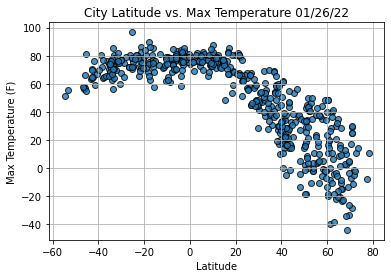

In [18]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

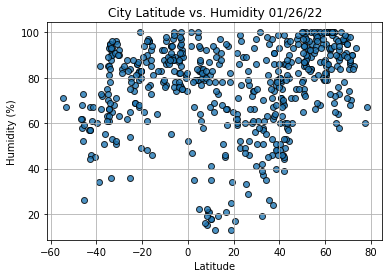

In [19]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()